In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [3]:
df.sample(10)

,Unnamed: 0,YearsExperience,Salary
24,24,8.8,109432.0
28,28,10.4,122392.0
25,25,9.1,105583.0
16,16,5.2,66030.0
3,3,2.1,43526.0
1,1,1.4,46206.0
8,8,3.3,64446.0
21,21,7.2,98274.0
7,7,3.3,54446.0
18,18,6.0,81364.0


Text(0, 0.5, 'Salary')

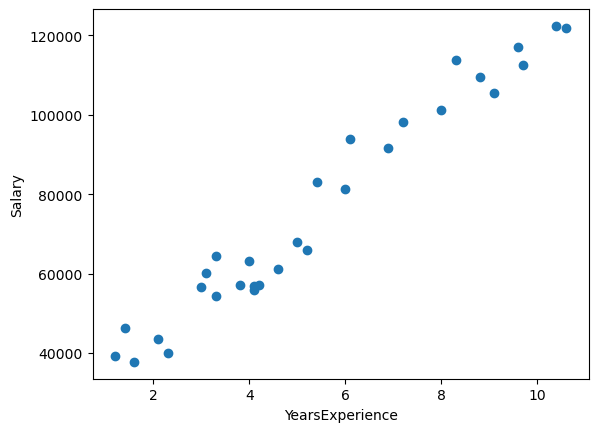

In [40]:
plt.scatter(x = "YearsExperience", y = "Salary", data = df)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [5]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df[['YearsExperience']], df[['Salary']], test_size=0.25, random_state=100)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
predition  = lr.predict(x_test)

Text(0, 0.5, 'Salary')

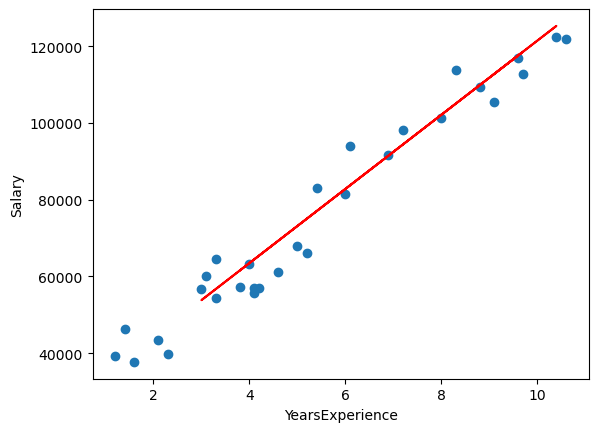

In [41]:
plt.scatter(x = "YearsExperience", y = "Salary", data = df)
plt.plot(x_test['YearsExperience'],lr.predict(x_test), color = "red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [42]:
lr.coef_

array([[9657.22661273]])

In [43]:
lr.intercept_

array([24857.13238724])

In [46]:
class LinearClass:
    '''
    This class implements the linear regression algorithm
    '''
    def __init__(self):
        '''
        Initializes the model parameters
        '''
        self.slope = None # Slope of the regression line(m)
        self.intercept = None # Intercept of the regression line(b)
        
    def fit(self, X_train,y_train):
        '''
        Fits the linear regression model to the training data
        
        Args:
            X_train (Numpy.ndarray) :  the traning features 
            y_train (Numpy.ndarray) :  the traning labels 
        '''
        # Have to calculate the numerator and denominator for the slope
        numerator = 0
        denominator = 0
        
        for i in range(X_train.shape[0]):
            numerator += ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            denominator += ((X_train[i] - X_train.mean()) ** 2)
        
        # Calculate the slope and intercept
        self.slope = numerator/denominator
        self.intercept = y_train.mean() - (self.slope * X_train.mean())
        
        # Print the slope and intercept for information purposes
        print("Slop m", self.slope)
        print("Intercept b", self.intercept)
        
    def predict(self, X_test):
        '''
        Predicts the labels for new data points 
        Args : 
            X_test (Numpy.ndarray)  :  The test features 
        Returns :
            Numpy.ndarray : the predicted labels 
        '''
        return self.slope*X_test + self.intercept        

In [47]:
lr = LinearClass()

In [56]:
lr.fit(x_train['YearsExperience'].values, y_train['Salary'].values)

Slop m 9657.226612725688
Intercept b 24857.132387239224


In [57]:
print(lr.predict(x_test))

    YearsExperience
9      61554.593516
26    117566.507869
28    125292.289160
13     65417.484161
5      53828.812225
12     64451.761499
27    118532.230531
25    112737.894563
